# Chapter 2. Statistical Learning

## Exercise 8

This exercise involves the `College` data set, which can be found in the file `College.csv`. It contains a number of variables for 777 different universities and colleges in the US.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = '../data/college.csv'
college_df = pd.read_csv(filename, index_col=0)

In [3]:
college_df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [4]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
college_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [6]:
college_df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

### Outstate vs Private

In [7]:
college_df[['Private', 'Outstate']].head()

Private  Outstate
Abilene Christian University     Yes      7440
Adelphi University               Yes     12280
Adrian College                   Yes     11250
Agnes Scott College              Yes     12960
Alaska Pacific University        Yes      7560

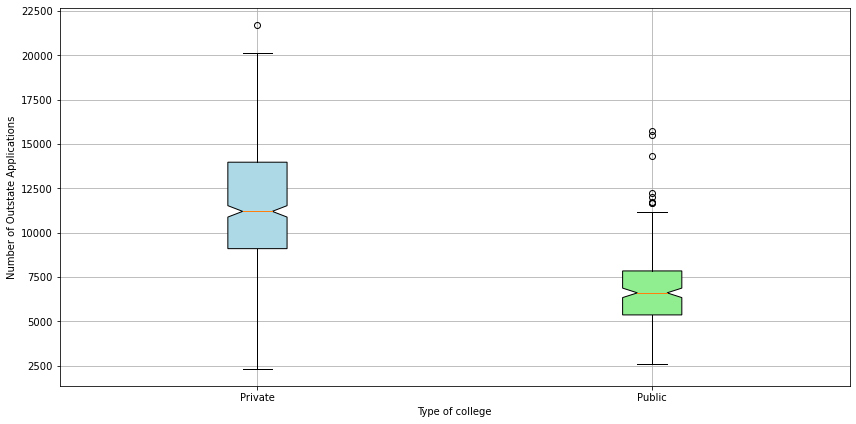

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

college_data = list()
col_private = ['Yes', 'No']
labels = ['Private', 'Public']
colors = ['lightblue', 'lightgreen']

# plot boxplots
for col_type in col_private:
    college_data.append(college_df.loc[college_df['Private'] == col_type, 'Outstate'].values)
bplot = axes.boxplot(college_data, patch_artist=True, labels=labels, notch=True, vert=True)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# adding axes labels and horizontal grid lines
axes.set_xlabel('Type of college')
axes.set_ylabel('Number of Outstate Applications')
plt.grid(True)
plt.tight_layout();

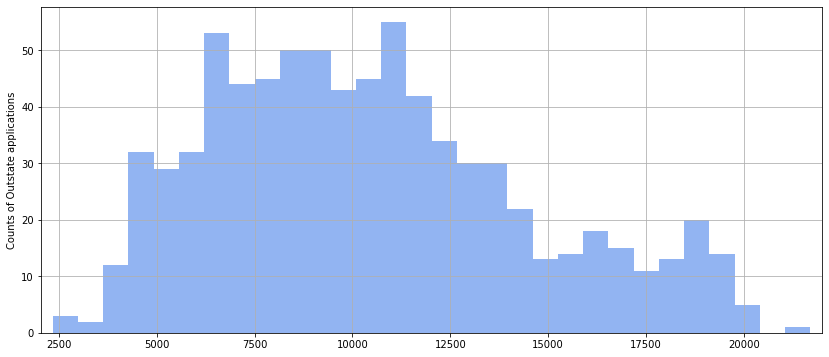

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
n, bins, patches = axes.hist(college_df.Outstate, bins=30, facecolor='cornflowerblue', alpha=0.7)
axes.set(ylabel='Counts of Outstate applications', xlim=[min(bins)-300, max(bins)+300])
plt.grid(True);

The distribution of data concerning all outstate applications doesn't appear to be normal. There seems to be a bulge on the right tail of the distribution.

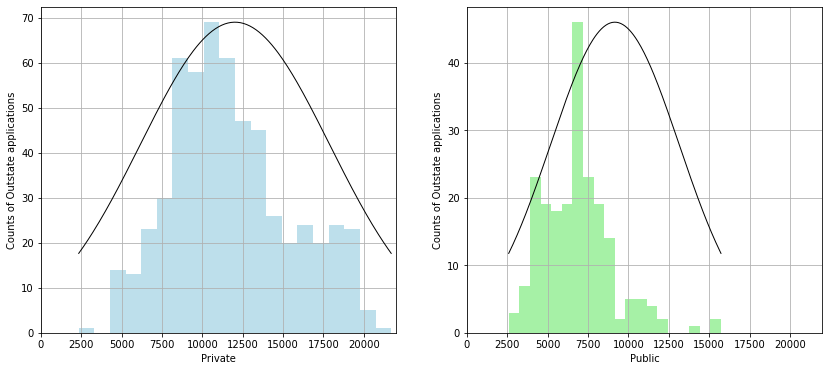

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['lightblue', 'lightgreen']
labels = ['Private', 'Public']

for i, ax in enumerate(axes):
    n, bins, patches = ax.hist(college_data[i], bins=20, facecolor=colors[i], alpha=0.8)
    mean = np.average(bins)
    std = np.std(bins)
    x = np.linspace(min(bins), max(bins), 200)
    y_norm = max(n) * np.exp(-0.5 * ((x - mean)/std)**2)
    ax.plot(x, y_norm, 'k-', lw=1)
    ax.set(xlabel=labels[i], ylabel='Counts of Outstate applications', xlim=[0, 22000])
    ax.axes.grid(True);

Neither distributions are normal, for there appears to be an excess at the high end for private universities and at the low end for public universities. This makes it questionable to use a Student t-test to discern the statistical difference between the two populations.

In [11]:
from scipy.stats import ttest_ind
ttest_ind(college_data[0], college_data[1], equal_var=False)

Ttest_indResult(statistic=23.2488932729844, pvalue=2.485387639315124e-87)

### Outstate vs Elite

In [12]:
college_df['Elite'] = (college_df['Top10perc'] > 50).astype('int').replace({1: 'Yes', 0: 'No'})
elite_df = college_df.loc[college_df['Elite'] == 'Yes', 'Outstate']
non_elite_df = college_df.loc[college_df['Elite'] == 'No', 'Outstate']

In [13]:
elite_df.shape

(78,)

In [14]:
non_elite_df.shape

(699,)

In [15]:
college_df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate Elite  
Abilene Christian University       18.1           12    7041         60    No  
Adelphi University                 12.2           16   10527         56    No  
Adrian College                     12.9           30    8735         54    No  
Agnes Scott College                 7.7           37   19016         59   Yes  
Alaska Pacific University          11.9            2   10922         15    No

In [16]:
elite_df.sort_values(ascending=False)[:10]

Massachusetts Institute of Technology    20100
Princeton University                     19900
Yale University                          19840
Amherst College                          19760
Williams College                         19629
Dartmouth College                        19545
Brown University                         19528
Sarah Lawrence College                   19300
Carleton College                         19292
Wesleyan University                      19130
Name: Outstate, dtype: int64

In [17]:
non_elite_df.sort_values(ascending=False)[:10]

Bennington College       21700
Gettysburg College       19964
Reed College             19960
Hamilton College         19700
Oberlin College          19670
Colgate University       19510
Brandeis University      19380
Mount Holyoke College    19300
Bard College             19264
Kenyon College           19240
Name: Outstate, dtype: int64

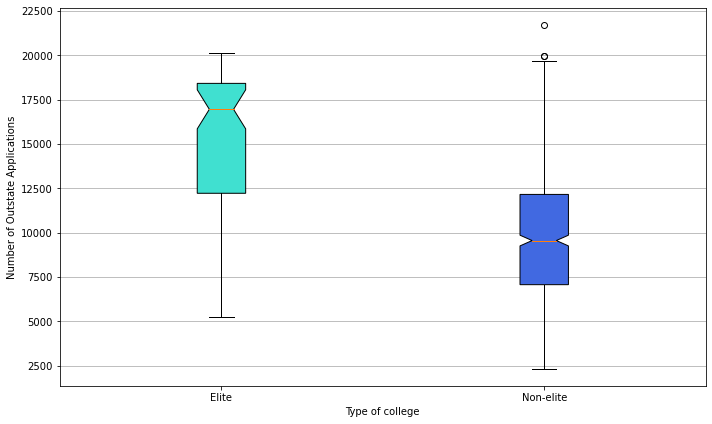

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))

labels = ['Elite', 'Non-elite']
colors = ['turquoise', 'royalblue']

# plot boxplots
elite_data = [elite_df, non_elite_df]
bplot = axes.boxplot(elite_data, patch_artist=True, labels=labels, notch=True, vert=True)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
axes.yaxis.grid(True)
axes.set_xlabel('Type of college')
axes.set_ylabel('Number of Outstate Applications')
plt.tight_layout();

In [19]:
ttest_ind(elite_data[0], elite_data[1], equal_var=False)

Ttest_indResult(statistic=10.999455113137401, pvalue=2.144133578759012e-18)

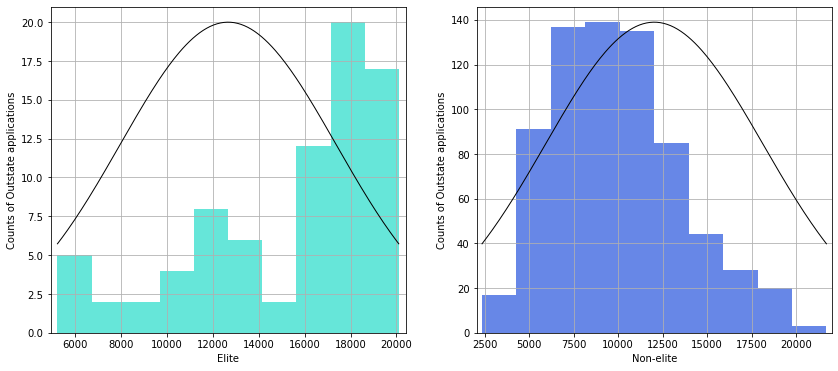

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

labels = ['Elite', 'Non-elite']
colors = ['turquoise', 'royalblue']

for i, ax in enumerate(axes):
    n, bins, patches = ax.hist(elite_data[i], bins=10, facecolor=colors[i], alpha=0.8)
    mean = np.average(bins)
    std = np.std(bins)
    x = np.linspace(min(bins), max(bins), 200)
    y_norm = max(n) * np.exp(-0.5 * ((x - mean)/std)**2)
    ax.plot(x, y_norm, 'k-', lw=1)
    ax.set(xlabel=labels[i], ylabel='Counts of Outstate applications', xlim=[min(bins)-300, max(bins)+300])
    ax.axes.grid(True);

Neither distributions are normal, which invalidates the use of a Student t-test to discern the statistical difference between the two populations.

In [21]:
from scipy.stats import ttest_ind
ttest_ind(elite_data[0], elite_data[1], equal_var=False)

Ttest_indResult(statistic=10.999455113137401, pvalue=2.144133578759012e-18)

### Pair plots

In [22]:
col1 = ['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate']
col2 = ['Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

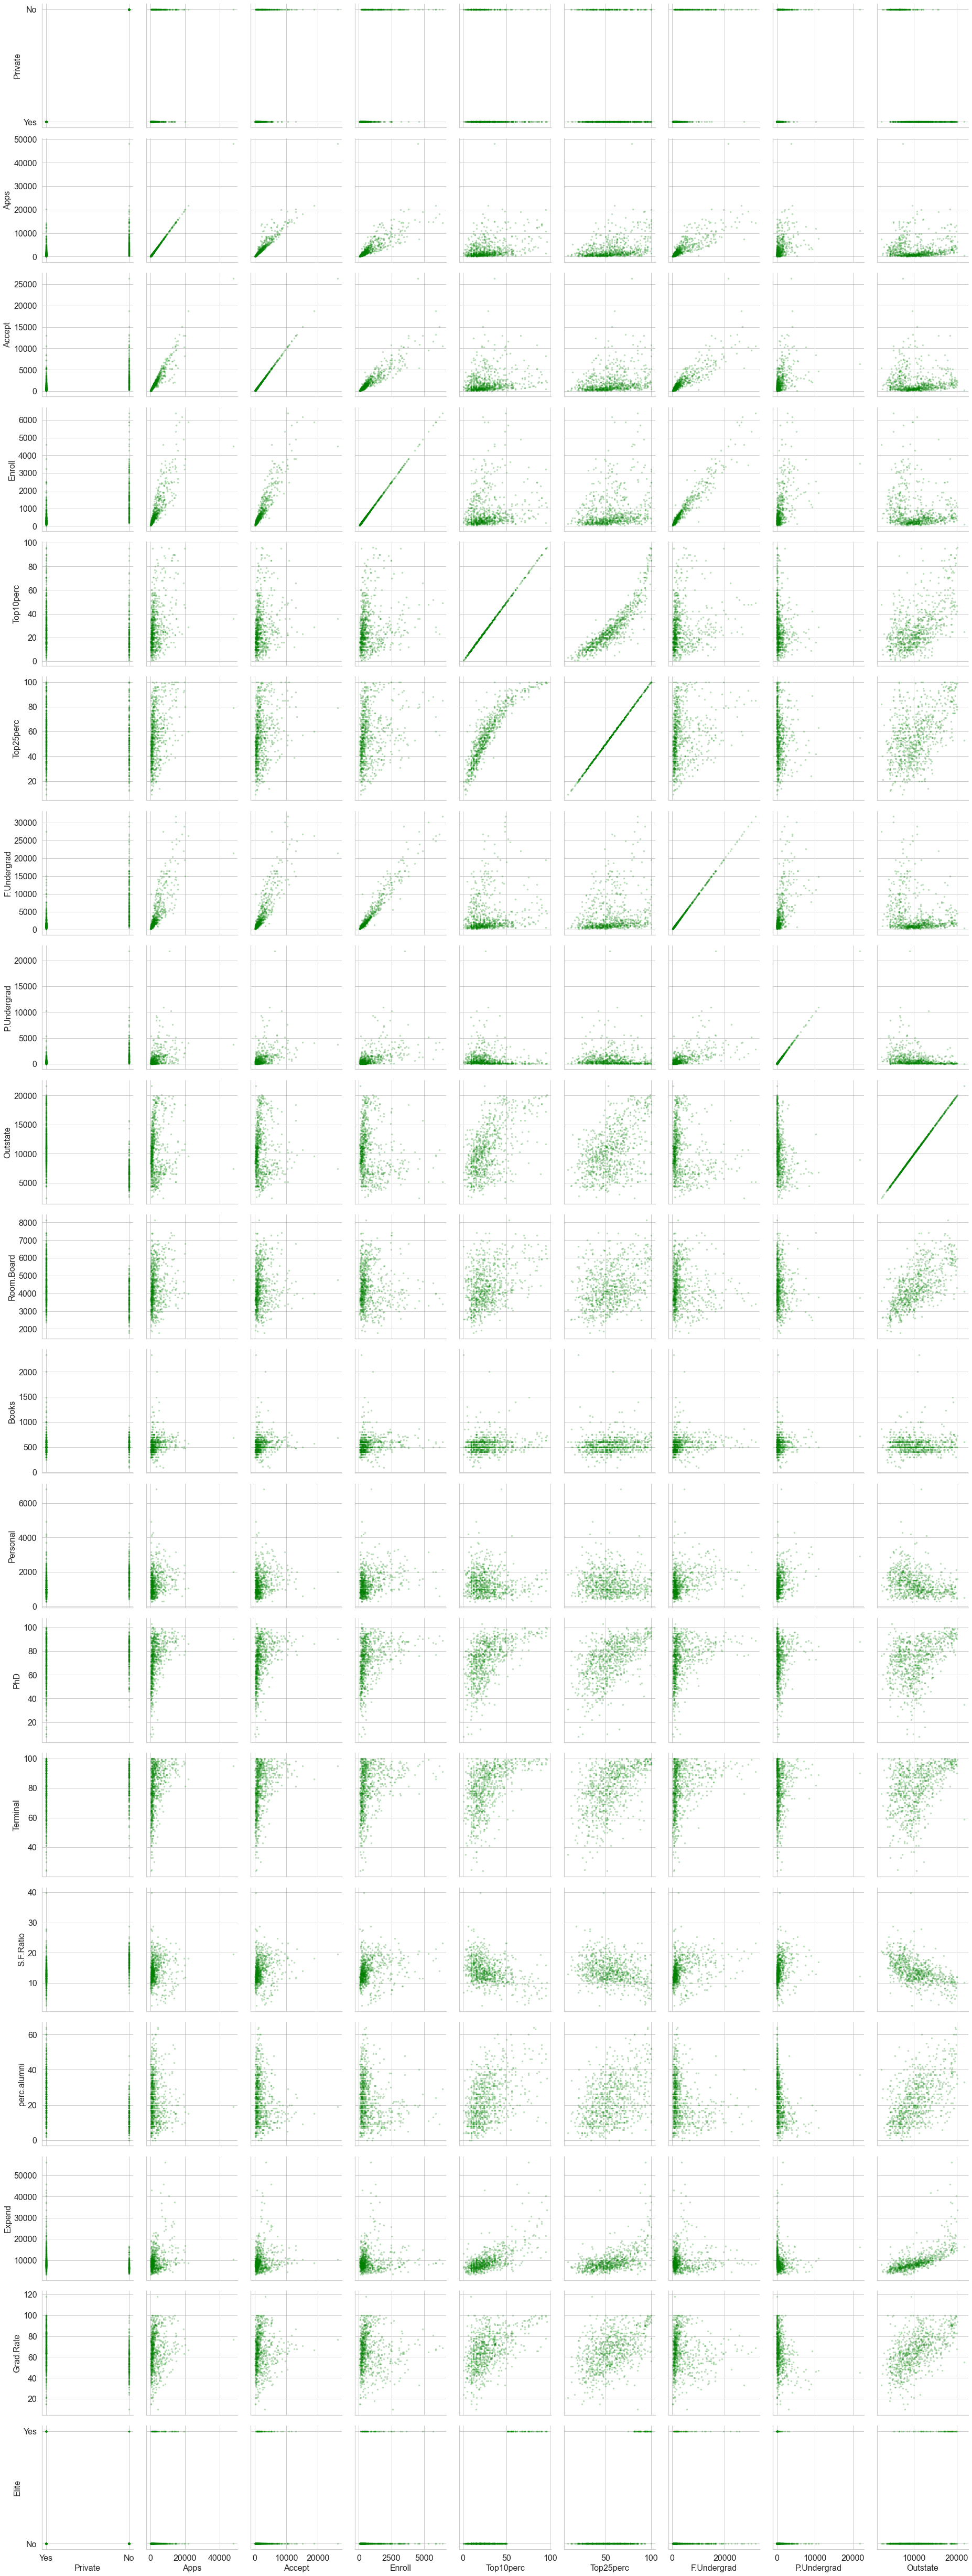

In [23]:
sns.set(style="whitegrid", color_codes=True)
df = college_df
g = sns.PairGrid(df, x_vars=col1, y_vars=list(df.columns.values), height=3.6, aspect=0.8)
g = g.map(plt.scatter, s=6, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 16

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();

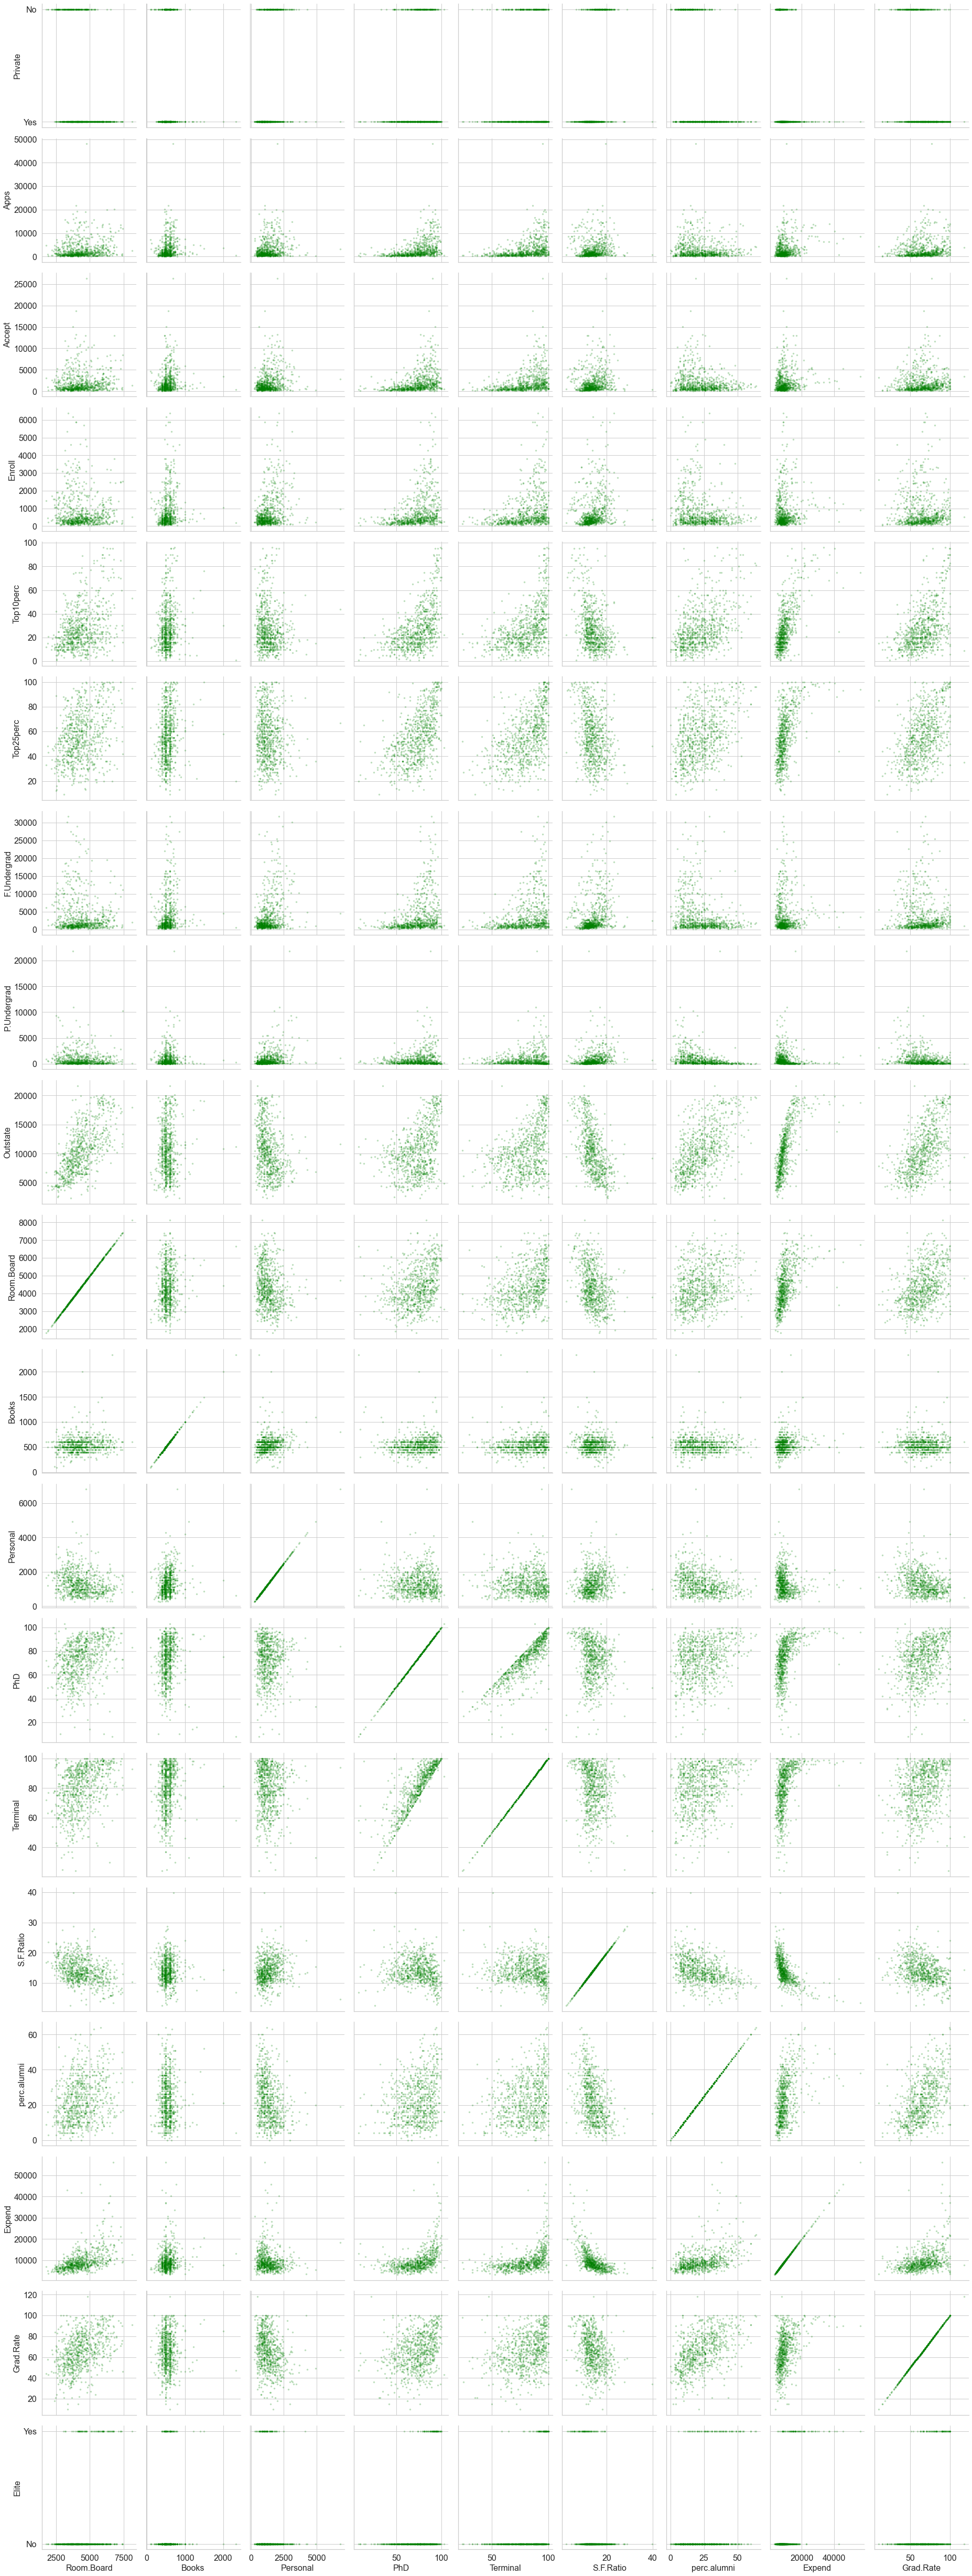

In [24]:
sns.set(style="whitegrid", color_codes=True)
df = college_df
g = sns.PairGrid(df, x_vars=col2, y_vars=list(df.columns.values), height=3.6, aspect=0.8)
g = g.map(plt.scatter, s=6, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 16

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();